# 손글씨 분류

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## 데이터 준비

In [2]:
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

print("전체 데이터:", digits_label.shape[0])

전체 데이터: 1797


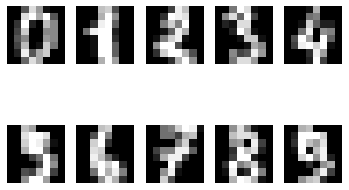

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')

plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, # 테스트 데이터 비중
                                                    random_state=7)

print("학습용:", X_train.shape[0])
print("테스트용:", X_test.shape[0])

학습용: 1437
테스트용: 360


## 5개 모델 학습

### 1. Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("[Report]\n", classification_report(y_test, y_pred, zero_division=0))
print("[Confusion Matrix]\n", confusion_matrix(y_test, y_pred))

[Report]
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

[Confusion Matrix]
 [[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0

### 2. Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print("[Report]\n", classification_report(y_test, y_pred, zero_division=0))
print("[Confusion Matrix]\n", confusion_matrix(y_test, y_pred))

[Report]
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

[Confusion Matrix]
 [[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  0  0  0

### 3. SVM

In [7]:
from sklearn import svm

svm_model = svm.SVC(random_state=32)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("[Report]\n", classification_report(y_test, y_pred, zero_division=0))
print("[Confusion Matrix]\n", confusion_matrix(y_test, y_pred))

[Report]
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[Confusion Matrix]
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0

### 4. SGD Classifier

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print("[Report]\n", classification_report(y_test, y_pred, zero_division=0))
print("[Confusion Matrix]\n", confusion_matrix(y_test, y_pred))

[Report]
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

[Confusion Matrix]
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  1  0  0  0  0  0  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  1  1  0]
 [ 0  0  0  0 36  0  1  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  1  0  0

### 5. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=32, max_iter=2500)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("[Report]\n", classification_report(y_test, y_pred, zero_division=0))
print("[Confusion Matrix]\n", confusion_matrix(y_test, y_pred))

[Report]
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

[Confusion Matrix]
 [[43  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  1  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  1  0]
 [ 0  0  0  0

## 모델 평가

### Q.

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요?

모델의 성능을 평가하는 지표로는 무엇이 좋을까요?

sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

### A.

*Classification Report*로 확인해보면 성능이 가장 나은 모델은 **SVM** 모델로 f1스코어 99%이다. 반면 성능이 가장 떨어지는 모델은 **Decision Tree**로 f1스코어 85%이다.

*Confusion Matrix*를 확인해보면 어떤 숫자의 판독이 가장 안되는지 확인할 수 있는데, 대체로 **8을 다른 숫자와 혼동**하는 경우가 많은 것을 확인할 수 있다.